In [2]:
import random
from time import perf_counter

import numpy as np
import pandas as pd
from tqdm import tqdm

import util
from descending_search import descending_search
from generator import RandomNumberGenerator
from simulated_annealing import simulated_annealing


def populate_distance_matrix(N, gen):
    D = np.full(shape=(N, N), fill_value=np.nan)
    n = D.shape[0]
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            D[i, j] = gen.nextInt(1, 30)
    return D



In [19]:
dist_matrix = populate_distance_matrix(10, RandomNumberGenerator(1))
init_temp = 1000
cooling_rate = 0.99
iter_space = 300
from util import generate_initial_solution
intitial_order = generate_initial_solution(10)

best_order_ds, best_distance_ds, distances_ds = descending_search(
                dist_matrix, iter_space, intitial_order
            )

best_order_sa, best_distance_sa, distances_sa = simulated_annealing(
                        dist_matrix,
                        init_temp,
                        cooling_rate,
                        iter_space,
                        intitial_order,
                    )

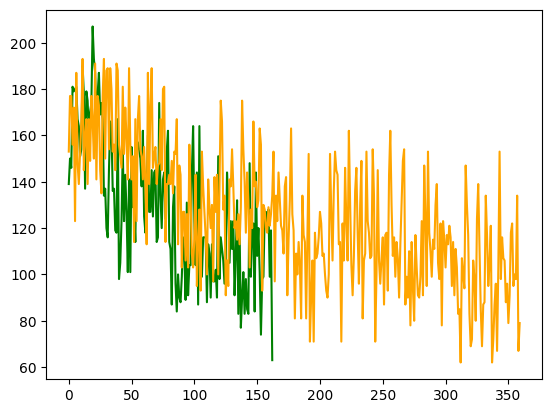

In [20]:
from matplotlib import pyplot as plt

plt.plot(distances_sa, color='green')
plt.plot(distances_ds, color='orange')
plt.show()